# Data Mining 7331 - Fall 2019
## Lab 3 - Use collaborative filtering to build a custom recommendation system

* **Allen Ansari**
* **Chad Madding**
* **Yongjun (Ian) Chu**

Nbviewer Link:
https://nbviewer.jupyter.org/github/cmadding/MSDS7331/blob/master/Lab03/Lab_3_Ansari_Madding_Chu_Final.ipynb

### Table of Contents<a id="top"></a>
* **[Business Understanding](#Business_Understanding)**
    * **[10 points]** Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?
* **[Data Understanding - Description](#Data_Understanding_Description)**
    * **[10 points]** Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?
* **[Data Understanding - Visualization](#Data_Understanding_Visualization)**
    * **[10 points]** Visualize any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.
* **[Modeling and Evaluation - Train & Adjust Parameters](#Modeling_and_Evaluation_Train_and_adjust_parameters)**
    * **[10 points]** Create user-item matrices or item-item matrices using collaborative filtering.
* **[Modeling and Evaluation - Evaluate & Compare](#Modeling_and_Evaluation_Evaluate_and_Compare)**
    * **[10 points]** Determine performance of the recommendations using different performance measures and explain what each measure.
* **[Modeling and Evaluation - Visualize Results](#Modeling_and_Evaluation_Visualize_Results)**
    * **[10 points]** Use tables/visualization to discuss the found results. Explain each visualization in detail.
* **[Modeling and Evaluation - Summarize The Ramifications](#Modeling_and_Evaluation_Summarize_The_Ramifications)**
    * **[20 points]** Describe your results. What findings are the most interesting and why?
* **[Deployment](#Deployment)**
    * **[10 points]** Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling?
        - How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)?
        - How would your deploy your model for interested parties?
        - What other data should be collected?
        - How often would the model need to be updated, etc.?
* **[Exceptional Work](#Exceptional_Work)**
    * **[10 points]** You have free reign to provide additional analyses or combine analyses.

<a href="#top">Back to Top</a>
### Business Understanding<a id="Business Understanding"></a>
* Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?

For this project, we use the MovieLens 20M Dataset from Kaggle (see the original reference below). 
These datasets, first released in 1998, describe people’s expressed preferences for movies. These preferences or ratings entered by users enable the recommender system at MovieLens web site to provide personalized movie recommendations for users. The MovieLens datasets are heavily downloaded (140,000+ downloads in 2014) and referenced in the research literature (7,500+ references to “movielens” in Google Scholar). These datasets promote the incredible growth of personalization and recommendation research, offering substantial value in exploring and validating ideas. Because movie preferences are highly subject to personal tastes, the movie domain is well-suited to testing personalization technology. Additionally, movies are a common interest, making algorithmic output easy to discuss and resulting extensive accessibility of movies as a content domain.  

Here we will build an effective recommendation system, by comparing two recommenders based on collaborative filtering: item_similarity recommender and ranking_factorization recommender provided by GraphLab Create. To measure the effectiveness of a recommender, we will first split the whole data into training set and validation set. By training a recommender with train set, we examine how it will perform with the validation set by checking the user_RMSE and movie item_RMSE. A better model would have statistically smaller (with 95% confidence) per user RMSE. In addition, we will also compare the per-user-recall for k-items and per-user-precision for k-items. Statistical comparisons can be completed to find superior performing models based on these values.

The item-based collaborative filtering recommendation systems are right choices for this specific dataset and the stakeholders needs. The main idea is to use information from others' behavior since a user can only rate limited number of movies. The validation method we use here makes a lot of sense. By randomly splitting the data into 80% training and 20% testing sets for each user, we test the performance of the recommenders for each user by comparing the movies recommended and movies actually rated positively. The values on per-user-precision and per-user-recall will tell us how well the models predicted.


* F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4, Article 19 (December 2015), 19 pages. DOI=http://dx.doi.org/10.1145/2827872

<a href="#top">Back to Top</a>
### Data Understanding - Description<a id="Data_Understanding_Description"></a>
* Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?

This dataset (ml-20m) describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 20000263 ratings and 465564 tag applications across 27278 movies. These data were created by 138493 users between January 09, 1995 and March 31, 2015. This dataset was generated on March 31, 2015, and updated on October 17, 2016 to update links.csv and add genome-* files.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in six files, `genome-scores.csv`, `genome-tags.csv`, `links.csv`, `movies.csv`, `ratings.csv` and `tags.csv`. For this project, we are only concerned about movies.csv and ratings.csv.

This and other GroupLens data sets are publicly available for download at <http://grouplens.org/datasets/>.

In [1]:
#load needed libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import spatial

#enable inline plotting
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import re
import os

In [2]:
#import of data
print(os.listdir("ml-20m"))

#genomescores = pd.read_csv("ml-20m/genome-scores.csv")
#genometags = pd.read_csv("ml-20m/genome-tags.csv")
#links = pd.read_csv("ml-20m/links.csv")
movies = pd.read_csv("ml-20m/movies.csv")
ratings = pd.read_csv("ml-20m/ratings.csv")
#tags = pd.read_csv("ml-20m/tags.csv")

['.gitignore', 'genome-scores.csv', 'genome-tags.csv', 'graphlabDF.csv', 'links.csv', 'mergedDF.csv', 'MLP-20M', 'movies.csv', 'ratings.csv', 'README.txt', 'result.csv', 'result1.csv', 'tags.csv']


In [3]:
#show the information for each feature in movies dataset
print(movies.head())
print(movies.info())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
movieId    27278 non-null int64
title      27278 non-null object
genres     27278 non-null object
dtypes: int64(1), object(2)
memory usage: 639.4+ KB
None


In [4]:
#add the poster file name for each movieId within new column 'poster'
movies['poster']=movies.apply(lambda x:'ml-20m/MLP-20M/%s.jpg' %(x['movieId']), axis=1)
#create a 'year' column
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
movies.head()

,movieId,title,genres,poster,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,ml-20m/MLP-20M/1.jpg,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,ml-20m/MLP-20M/2.jpg,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,ml-20m/MLP-20M/3.jpg,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,ml-20m/MLP-20M/4.jpg,1995
4,5,Father of the Bride Part II (1995),Comedy,ml-20m/MLP-20M/5.jpg,1995


In [5]:
#show the information for each feature in ratings dataset
print(ratings.head())
print(ratings.info())

   userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 610.4 MB
None


In [6]:
#generate the final source dataset to be used for all the analysis
result = pd.merge(movies,
                 ratings[['userId', 'movieId', 'rating']],
                 on='movieId')
print(result.head())
print(result.info())

   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

                 poster  year  userId  rating  
0  ml-20m/MLP-20M/1.jpg  1995       3     4.0  
1  ml-20m/MLP-20M/1.jpg  1995       6     5.0  
2  ml-20m/MLP-20M/1.jpg  1995       8     4.0  
3  ml-20m/MLP-20M/1.jpg  1995      10     4.0  
4  ml-20m/MLP-20M/1.jpg  1995      11     4.5  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000263 entries, 0 to 20000262
Data columns (total 7 columns):
movieId    int64
title      object
genres     object
poster     object
year       object
userId     int64
rating     float64
dtypes: fl

The source dataset has 20000263 rows and 7 columns (movieId, title, genres, poster, year, userId, rating). 

In [7]:
#Checking for any missing values in "result" dataset

# Total missing values for each feature
result.isnull().sum()


movieId     0
title       0
genres      0
poster      0
year       86
userId      0
rating      0
dtype: int64

There are only 86 missing values in column year. Since in the following data analysis, "year" is not used, we will just leave as it is. 

In [8]:
#Are there any duplicate entries in the dataset?

duplicateRowsDF = result[result.duplicated(keep='first')]

print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

#print(f"\nThere are {len(duplicateRowsDF)} duplicated entries in the dataset!")

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [movieId, title, genres, poster, year, userId, rating]
Index: []


No duplicate rows were found. 

{'boxes': [<matplotlib.lines.Line2D at 0xa248708>],
 'caps': [<matplotlib.lines.Line2D at 0xa265a08>,
 'fliers': [<matplotlib.lines.Line2D at 0xa275c48>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xa2755c8>],
 'whiskers': [<matplotlib.lines.Line2D at 0xa248e88>,
  <matplotlib.lines.Line2D at 0xa265448>]}

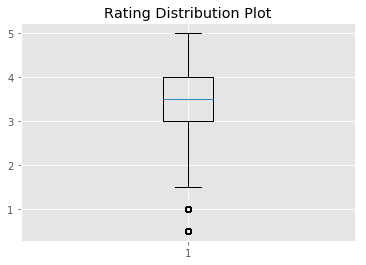

In [9]:
#check for any outliers

#Since rating is the only feature that may have meaningful ourliers, we just make a boxplot of rating.
#boxplot of vaiable rating
plt.style.use('ggplot')
fig1, ax1 = plt.subplots()
ax1.set_title('Rating Distribution Plot')
ax1.boxplot(result['rating'])

The data range of "rating" is obviously from 0 to 5. Therefore, there are no outliers in the dataset. 

In [10]:
#generate the final simplified dataset to build a recommendation system
result1= result[["userId", "title", "rating"]]
print(result1.head())
print(result1.info())

   userId             title  rating
0       3  Toy Story (1995)     4.0
1       6  Toy Story (1995)     5.0
2       8  Toy Story (1995)     4.0
3      10  Toy Story (1995)     4.0
4      11  Toy Story (1995)     4.5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000263 entries, 0 to 20000262
Data columns (total 3 columns):
userId    int64
title     object
rating    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 610.4+ MB
None


In [11]:
#find what movies got the most ratings
result1.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Pulp Fiction (1994)                          67310
Forrest Gump (1994)                          66172
Shawshank Redemption, The (1994)             63366
Silence of the Lambs, The (1991)             63299
Jurassic Park (1993)                         59715
Star Wars: Episode IV - A New Hope (1977)    54502
Braveheart (1995)                            53769
Terminator 2: Judgment Day (1991)            52244
Matrix, The (1999)                           51334
Schindler's List (1993)                      50054
Name: rating, dtype: int64

In [12]:
#Export our data set to use for GraphLab
result1.to_csv(r'ml-20m\result1.csv', index = None, header=True)

<a href="#top">Back to Top</a>
### Data Understanding - Visualization<a id="Data_Understanding_Visualization"></a>
* Visualize any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.

Text(0.5,1,'Histogram of movie rating averages')

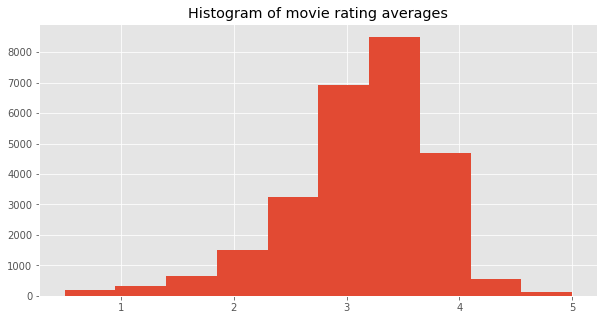

In [13]:
#looking at the rating average for each movie
avg_ratings= result1.groupby('title', as_index=False).mean()

avg_ratings.hist(column='rating', figsize=(10,5))
plt.title("Histogram of movie rating averages")

In [14]:
avg_ratings.head()

,title,userId,rating
0,"""Great Performances"" Cats (1998)",66414.658065,2.748387
1,#chicagoGirl: The Social Network Takes on a Di...,65392.666667,3.666667
2,$ (Dollars) (1971),83316.958333,2.833333
3,$5 a Day (2008),57626.461538,2.871795
4,$9.99 (2008),73360.909091,3.009091


It appears that the distribution of movie rating averages is near a normal distribution, centered around at 3.5. 

Text(0.5,1,'Histogram of movie ratings')

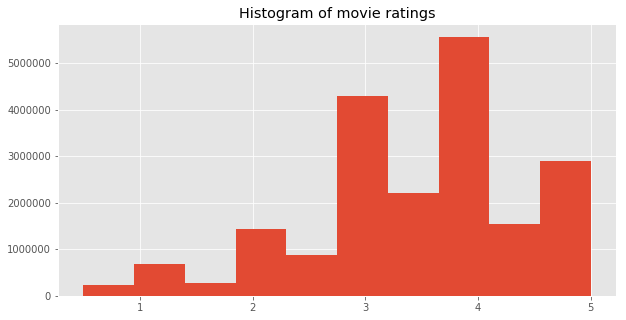

In [15]:
#looking at the distribution of the ratings
result1.hist(column='rating', figsize=(10,5))
plt.title("Histogram of movie ratings")

Based on the plot above, it appears that the movies having a rating close 4 have the most counts, over 5,000,000. 

Text(0.5,1,'Histogram of the number of ratings for each movie')

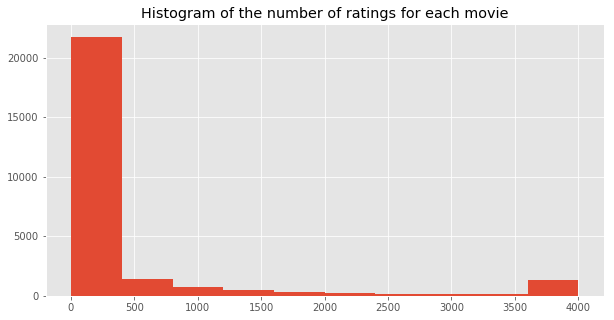

In [16]:
#looking at the number of ratings per movieid
ratings_movie= result1.groupby('title')['rating'].count().clip(upper=4000)
ratings_movie.hist(figsize=(10,5))
plt.title("Histogram of the number of ratings for each movie")

The above histogram shows that most of the movies (> 20, 000) have less than 500 ratings. 

Text(0.5,1,'Histogram of the number of ratings for each user')

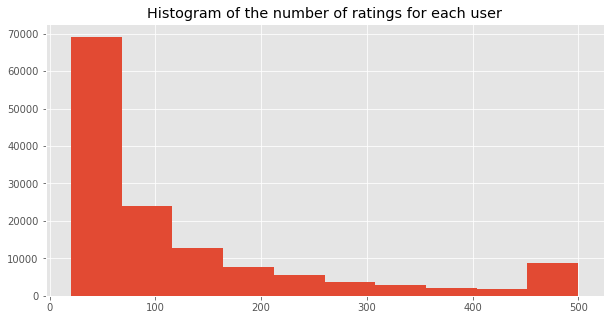

In [17]:
#looking at the numbr of ratings per user
ratings_user= result1.groupby('userId')['rating'].count().clip(upper=500)
ratings_user.hist(figsize=(10,5))
plt.title("Histogram of the number of ratings for each user")

The above histogram shows that most of the users rated movies 100 or less times in the dataset. 

Text(0.5,1,'The top 10 rated genres')

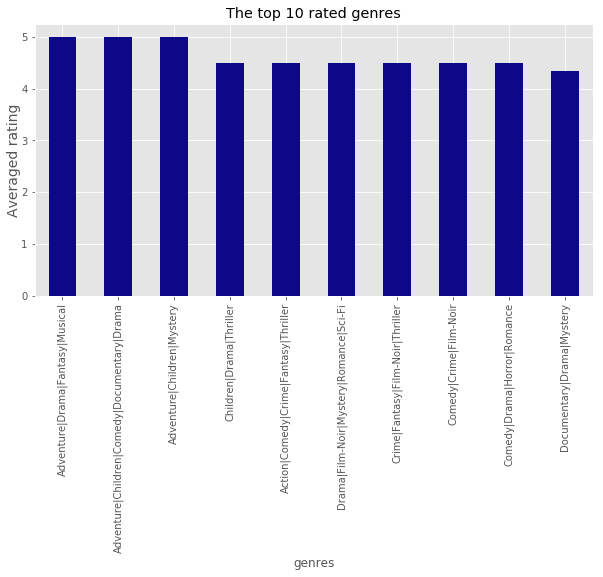

In [18]:
#plot the Genres vs average_ratings to show top 10 most popular genres

plt.style.use('ggplot')
%matplotlib inline

plt.figure(1, figsize=(10,5))
result_grouped = result.groupby(by=['genres'])
average_rating = result_grouped.rating.sum() / result_grouped.rating.count()
new = average_rating.sort_values(ascending=False).head(10)
ax=new.plot(kind='bar', colormap = "plasma") 
plt.ylabel("Averaged rating", fontsize = 14, labelpad = 0)
plt.title("The top 10 rated genres")

The top 10 rated genres based on averaged ratings are plotted above. It appears that movies that are musical, drama or mystery in the dataset are highly rated. 

<a href="#top">Back to Top</a>
### Modeling and Evaluation - Train & Adjust Parameters<a id="Modeling_and_Evaluation_Train_and_adjust_parameters"></a>

We will be using a user-item matrices for our recommendation system. The utility matrices will be sparse due to the fact that every user did not review every movie. So in the data we are more likely to see mostly null values. 

We will use matrix factorization to build recommender systems. Specifically, we will use item_similarity and ranking_factorization recommenders from GraphLab Create. First, we would like to find the best parameter setting for each recommender.

In [19]:
# Import Graphlab and load the data file to build a recommendation system

import graphlab as gl

data = gl.SFrame.read_csv("ml-20m/result1.csv", 
                          column_type_hints={"rating":float})
#model = gl.recommender.create(data, user_id="userId", item_id="movieId", target="rating")
#results = model.recommend(users=None, k=5)
#model.save("my_model")


This non-commercial license of GraphLab Create for academic use is assigned to cmadding@smu.edu and will expire on November 18, 2020.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\04616598\AppData\Local\Temp\graphlab_server_1575086132.log.0


Finished parsing file C:\Users\04616598\Box Sync\Documents\Data Sciance\msds_7331MachineLearningI\MSDS7331\Lab03\ml-20m\result1.csv

Parsing completed. Parsed 100 lines in 0.820805 secs.

Read 1528914 lines. Lines per second: 1.65551e+006

Read 19562450 lines. Lines per second: 3.29771e+006

Finished parsing file C:\Users\04616598\Box Sync\Documents\Data Sciance\msds_7331MachineLearningI\MSDS7331\Lab03\ml-20m\result1.csv

Parsing completed. Parsed 20000263 lines in 6.02888 secs.

In [20]:
#generate a train and a test sub-datasets for parameter tuning and performance comparison
train, test = gl.recommender.util.random_split_by_user(data, random_seed = 75205,
                                                    user_id="userId", item_id="title",
                                                    max_num_users=100, item_test_proportion=0.2)

To reduce the computation time, we only chose 100 users for train/test datasets.

In [21]:
print(test)

+--------+-------------------------------+--------+
| userId |             title             | rating |
+--------+-------------------------------+--------+
| 29110  |        Toy Story (1995)       |  5.0   |
| 75676  |        Toy Story (1995)       |  5.0   |
| 115585 |        Toy Story (1995)       |  4.0   |
| 118929 |        Toy Story (1995)       |  4.0   |
| 120813 |        Toy Story (1995)       |  4.0   |
| 49190  |         Jumanji (1995)        |  3.0   |
| 63232  |         Jumanji (1995)        |  2.5   |
| 104017 |    Grumpier Old Men (1995)    |  1.5   |
| 104017 |    Waiting to Exhale (1995)   |  1.5   |
| 37402  | Father of the Bride Part I... |  3.0   |
+--------+-------------------------------+--------+
[2512 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


#### Find the best parameters for item_similarity recommender

The graphlab method, "model_paramter_search", doesn't support the item_similarity_recommender currently.

We have to manually find the best parameters. There are essentially only two parameters that may need to be optimized: only_top_k and similarity_type. Since our user_item matrix obtained is sparse, choosing "cosine" is the best choice. Therefore, we only need to optimize the values for only_top_k. Here we are to find which one gives the best validation results among 5 values: 5,10,15,20,25. The default value is 64. However, bigger value will require significantly more computational power. We feel like that choosing 5 to 25 is a reasonable range.

In [22]:
#find the best parameter for only_top_k
from IPython.display import display
from IPython.display import Image

gl.canvas.set_target('ipynb')

top_k = [5,10,15,20,25]
item_item = []

for i in range(len(top_k)):
    item_simi = gl.recommender.item_similarity_recommender.create(train, 
                                  user_id="userId", 
                                  item_id="title", 
                                  target="rating",
                                  only_top_k= top_k[i],
                                  similarity_type="cosine")
    
    item_item.append(item_simi)

Recsys training: model = item_similarity

Preparing data set.

Data has 19997751 observations with 138493 users and 26729 items.

Data prepared in: 14.0265s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 4.986ms                        | 0.5        |

| 236.368ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 1.11s                               | 0                | 0               |

| 2.11s                               | 2.5              | 671             |

| 3.11s                               | 5.25             | 1404            |

| 4.11s                               | 7.5              | 2052            |

| 5.11s                               | 10               | 2701            |

| 6.11s                               | 12.5             | 3392            |

| 7.11s                               | 15.25            | 4089            |

| 8.11s                               | 17.75            | 4787            |

| 9.12s                               | 20.75            | 5562            |

| 10.11s                              | 23.75            | 6352            |

| 11.12s                              | 26.5             | 7147            |

| 12.12s                              | 29.25            | 7855            |

| 13.12s                              | 32               | 8582            |

| 14.12s                              | 35               | 9400            |

| 15.13s                              | 38.25            | 10267           |

| 16.13s                              | 42               | 11249           |

| 17.12s                              | 44.75            | 11972           |

| 18.13s                              | 47.75            | 12767           |

| 19.12s                              | 50.5             | 13513           |

| 20.12s                              | 53.25            | 14277           |

| 21.14s                              | 56.25            | 15040           |

| 22.12s                              | 58.75            | 15737           |

| 23.13s                              | 61.5             | 16462           |

| 24.13s                              | 64               | 17110           |

| 25.13s                              | 66.5             | 17829           |

| 26.13s                              | 69.25            | 18527           |

| 27.13s                              | 71.5             | 19126           |

| 28.13s                              | 73.75            | 19712           |

| 29.13s                              | 76               | 20321           |

| 30.13s                              | 78               | 20899           |

| 31.13s                              | 80.25            | 21483           |

| 32.14s                              | 82.25            | 22048           |

| 33.13s                              | 84.5             | 22602           |

| 34.13s                              | 86.5             | 23150           |

| 35.14s                              | 88.5             | 23687           |

| 36.14s                              | 90.5             | 24220           |

| 37.14s                              | 92.5             | 24732           |

| 38.14s                              | 94.25            | 25240           |

| 39.14s                              | 96.25            | 25730           |

| 40.14s                              | 98               | 26243           |

| 43.57s                              | 100              | 26729           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 45.2097s

Recsys training: model = item_similarity

Preparing data set.

Data has 19997751 observations with 138493 users and 26729 items.

Data prepared in: 14.0145s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 3.99ms                         | 0.5        |

| 269.28ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 1.13s                               | 0                | 0               |

| 2.13s                               | 2.25             | 657             |

| 3.13s                               | 5                | 1348            |

| 4.14s                               | 7.5              | 2040            |

| 5.14s                               | 10               | 2700            |

| 6.14s                               | 12.5             | 3381            |

| 7.14s                               | 15               | 4075            |

| 8.14s                               | 17.75            | 4784            |

| 9.14s                               | 20.5             | 5541            |

| 10.14s                              | 23.5             | 6335            |

| 11.14s                              | 26.5             | 7104            |

| 12.14s                              | 29.25            | 7847            |

| 13.15s                              | 31.75            | 8532            |

| 14.15s                              | 34.5             | 9261            |

| 15.14s                              | 37.5             | 10032           |

| 16.15s                              | 40.5             | 10863           |

| 17.15s                              | 43.5             | 11634           |

| 18.15s                              | 46.25            | 12396           |

| 19.15s                              | 49.75            | 13308           |

| 20.15s                              | 52.25            | 14030           |

| 21.15s                              | 55               | 14742           |

| 22.15s                              | 57.5             | 15403           |

| 23.17s                              | 60.25            | 16163           |

| 24.15s                              | 63               | 16859           |

| 25.15s                              | 65.25            | 17452           |

| 26.16s                              | 67.75            | 18154           |

| 27.16s                              | 70               | 18747           |

| 28.16s                              | 72.5             | 19440           |

| 29.16s                              | 75.25            | 20132           |

| 30.16s                              | 77.75            | 20785           |

| 31.16s                              | 80               | 21394           |

| 32.16s                              | 82               | 21960           |

| 33.16s                              | 84               | 22507           |

| 34.16s                              | 86.25            | 23059           |

| 35.16s                              | 88               | 23581           |

| 36.16s                              | 90               | 24090           |

| 37.17s                              | 92               | 24590           |

| 38.17s                              | 93.75            | 25088           |

| 39.17s                              | 95.5             | 25582           |

| 40.17s                              | 97.5             | 26086           |

| 41.17s                              | 99.25            | 26585           |

| 44.06s                              | 100              | 26729           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 44.7543s

Recsys training: model = item_similarity

Preparing data set.

Data has 19997751 observations with 138493 users and 26729 items.

Data prepared in: 14.2818s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 2.992ms                        | 0.5        |

| 272.271ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 1.14s                               | 0                | 0               |

| 2.14s                               | 2.5              | 678             |

| 3.14s                               | 5                | 1374            |

| 4.15s                               | 7.75             | 2073            |

| 5.14s                               | 10               | 2721            |

| 6.14s                               | 12.75            | 3426            |

| 7.14s                               | 15.25            | 4126            |

| 8.16s                               | 18.25            | 4922            |

| 9.14s                               | 21.75            | 5839            |

| 10.15s                              | 25.5             | 6836            |

| 11.16s                              | 28.75            | 7729            |

| 12.15s                              | 32               | 8580            |

| 13.15s                              | 35               | 9388            |

| 14.16s                              | 38.25            | 10235           |

| 15.15s                              | 41               | 11016           |

| 16.16s                              | 44               | 11783           |

| 17.15s                              | 46.75            | 12516           |

| 18.15s                              | 49.5             | 13232           |

| 19.15s                              | 52               | 13957           |

| 20.17s                              | 54.75            | 14657           |

| 21.16s                              | 57.25            | 15338           |

| 22.16s                              | 59.75            | 16009           |

| 23.16s                              | 62.25            | 16650           |

| 24.16s                              | 64.5             | 17275           |

| 25.16s                              | 66.75            | 17897           |

| 26.16s                              | 69               | 18500           |

| 27.16s                              | 71.5             | 19138           |

| 28.16s                              | 73.75            | 19741           |

| 29.16s                              | 76               | 20350           |

| 30.16s                              | 78.25            | 20956           |

| 31.16s                              | 80.5             | 21522           |

| 32.17s                              | 82.5             | 22087           |

| 33.17s                              | 84.5             | 22647           |

| 34.17s                              | 86.75            | 23203           |

| 35.17s                              | 88.75            | 23742           |

| 36.17s                              | 90.75            | 24269           |

| 37.17s                              | 92.5             | 24770           |

| 38.17s                              | 94.5             | 25265           |

| 39.17s                              | 96.25            | 25768           |

| 40.17s                              | 98.25            | 26281           |

| 43.71s                              | 100              | 26729           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 44.5708s

Recsys training: model = item_similarity

Preparing data set.

Data has 19997751 observations with 138493 users and 26729 items.

Data prepared in: 14.3815s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 2.993ms                        | 0.5        |

| 255.318ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 1.12s                               | 0                | 0               |

| 2.13s                               | 2.25             | 667             |

| 3.12s                               | 5                | 1357            |

| 4.13s                               | 7.5              | 2062            |

| 5.13s                               | 10               | 2725            |

| 6.13s                               | 12.75            | 3418            |

| 7.13s                               | 15.25            | 4086            |

| 8.13s                               | 18.25            | 4879            |

| 9.14s                               | 21.5             | 5779            |

| 10.13s                              | 25.25            | 6763            |

| 11.13s                              | 28.5             | 7630            |

| 12.14s                              | 31.5             | 8485            |

| 13.14s                              | 34.5             | 9277            |

| 14.14s                              | 37.75            | 10116           |

| 15.14s                              | 40.5             | 10881           |

| 16.14s                              | 43.5             | 11644           |

| 17.14s                              | 46               | 12347           |

| 18.14s                              | 48.75            | 13076           |

| 19.14s                              | 51.5             | 13805           |

| 20.14s                              | 54               | 14495           |

| 21.14s                              | 56.5             | 15139           |

| 22.14s                              | 58.75            | 15741           |

| 23.14s                              | 61               | 16326           |

| 24.15s                              | 63.25            | 16934           |

| 25.14s                              | 65.5             | 17530           |

| 26.15s                              | 67.75            | 18123           |

| 27.15s                              | 69.75            | 18705           |

| 28.15s                              | 72               | 19280           |

| 29.15s                              | 74               | 19838           |

| 30.15s                              | 76.25            | 20414           |

| 31.15s                              | 78.5             | 21023           |

| 32.15s                              | 80.5             | 21580           |

| 33.15s                              | 82.75            | 22132           |

| 34.15s                              | 84.75            | 22704           |

| 35.15s                              | 87               | 23272           |

| 36.15s                              | 89               | 23828           |

| 37.16s                              | 91               | 24356           |

| 38.16s                              | 93               | 24877           |

| 39.16s                              | 94.75            | 25338           |

| 40.16s                              | 96.5             | 25828           |

| 41.16s                              | 98.5             | 26342           |

| 44.71s                              | 100              | 26729           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 45.3956s

Recsys training: model = item_similarity

Preparing data set.

Data has 19997751 observations with 138493 users and 26729 items.

Data prepared in: 14.5601s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 3.989ms                        | 0.5        |

| 233.376ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 1.11s                               | 0                | 0               |

| 2.11s                               | 2.25             | 649             |

| 3.11s                               | 5                | 1341            |

| 4.11s                               | 7.5              | 2005            |

| 5.11s                               | 9.75             | 2672            |

| 6.11s                               | 12.5             | 3377            |

| 7.12s                               | 15               | 4070            |

| 8.12s                               | 17.75            | 4776            |

| 9.12s                               | 20.5             | 5531            |

| 10.12s                              | 23.5             | 6325            |

| 11.12s                              | 26.5             | 7093            |

| 12.12s                              | 29.25            | 7844            |

| 13.12s                              | 32               | 8572            |

| 14.12s                              | 34.75            | 9301            |

| 15.12s                              | 37.5             | 10044           |

| 16.12s                              | 40.5             | 10881           |

| 17.13s                              | 43.5             | 11651           |

| 18.12s                              | 46.5             | 12429           |

| 19.13s                              | 49.5             | 13283           |

| 20.13s                              | 52.5             | 14073           |

| 21.13s                              | 55               | 14755           |

| 22.13s                              | 57.5             | 15430           |

| 23.13s                              | 60.25            | 16107           |

| 24.13s                              | 62.75            | 16773           |

| 25.13s                              | 65               | 17438           |

| 26.13s                              | 67.25            | 18028           |

| 27.13s                              | 69.75            | 18676           |

| 28.13s                              | 72.5             | 19418           |

| 29.13s                              | 75               | 20094           |

| 30.14s                              | 77.5             | 20755           |

| 31.14s                              | 79.75            | 21377           |

| 32.14s                              | 82               | 21957           |

| 33.14s                              | 84               | 22514           |

| 34.14s                              | 86.25            | 23064           |

| 35.14s                              | 88.25            | 23595           |

| 36.14s                              | 90               | 24097           |

| 37.14s                              | 92               | 24622           |

| 38.14s                              | 93.75            | 25124           |

| 39.14s                              | 95.75            | 25635           |

| 40.14s                              | 97.75            | 26153           |

| 41.14s                              | 99.5             | 26646           |

| 44.30s                              | 100              | 26729           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 45.0834s

We want to compare which model gives the best performance overall. So we decided to use graphlab compare( ) method for comparison.

In [23]:
comparisonstruct = gl.compare(test,item_item)

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    |      0.42      | 0.0281205111405 |
|   2    |     0.375      | 0.0530206214492 |
|   3    | 0.383333333333 | 0.0792510595951 |
|   4    |      0.35      |  0.100160404739 |
|   5    |     0.336      |  0.114857061227 |
|   6    | 0.321666666667 |  0.132161171907 |
|   7    | 0.307142857143 |  0.142108706774 |
|   8    |     0.295      |  0.153214917373 |
|   9    | 0.288888888889 |  0.165192663614 |
|   10   |     0.283      |  0.176801251216 |
+--------+----------------+-----------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    |      0.43      | 0.0406326

We want to compare which model gives the best performance overall. 

In [24]:
gl.show_comparison(comparisonstruct,item_item)

From the above graph, it is clear that all five models performed equally well based on the overall precision and recall values for all 18 cutoff values chosen. Since with only_top_k equal to 5 requires the least memory and computation time, we chose "only_top_k = 5" for all the following item_similarity recommender.

#### Find the best parameters for ranking_factorization recommender

A RankingFactorizationRecommender learns latent factors for each user and item and uses them to rank recommended items according to the likelihood of observing those (user, item) pairs. This is commonly desired when performing collaborative filtering for implicit feedback datasets or datasets with explicit ratings for which ranking prediction is desired.

RankingFactorizationRecommender contains a number of options that tailor to a variety of datasets and evaluation metrics, making this one of the most powerful models in the GraphLab Create recommender toolkit.

In [25]:
#optimize parameters to find the best model parameters
params = {'user_id': 'userId', 
          'item_id': 'title', 
          'target': 'rating',
          'num_factors': [8, 12, 16, 24, 32], 
          'regularization':[0.001] ,
          'linear_regularization': [0.001]}

job = gl.model_parameter_search.create( (train,test),
        gl.recommender.ranking_factorization_recommender.create,
        params,
        max_models=5,
        environment=None)

[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.job: Creating a LocalAsync environment called 'async'.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Nov-29-2019-22-00-4900000' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Nov-29-2019-22-00-4900000' scheduled.
[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.map_job: A job with name 'Model-Parameter-Search-Nov-29-2019-22-00-4900000' already exists. Renaming the job to 'Model-Parameter-Search-Nov-29-2019-22-00-4900000-f1e42'.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Nov-29-2019-22-00-4900000-f1e42' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Nov-29-2019-22-00-4900000-f1e42' scheduled.


In [26]:
job.get_status()

{'Canceled': 0, 'Completed': 0, 'Failed': 0, 'Pending': 5, 'Running': 0}

In [27]:
job_result = job.get_results()

job_result.head()

model_id,item_id,linear_regularization,max_iterations,num_factors,num_sampled_negative_examples ...,ranking_regularization
1,title,0.001,50,16,8,0.25
0,title,0.001,50,32,8,0.5
3,title,0.001,25,16,8,0.25
2,title,0.001,50,32,4,0.1
4,title,0.001,50,8,8,0.25
regularization,target,user_id,training_precision@5,training_recall@5,training_rmse,validation_precision@5
0.001,rating,userId,0.388517831226,0.023685956787,0.990540257525,0.176
0.001,rating,userId,0.388517831226,0.023685956787,0.997890254247,0.174
0.001,rating,userId,0.388517831226,0.023685956787,0.990551019035,0.176
0.001,rating,userId,0.388517831226,0.023685956787,0.98418381287,0.176


In [28]:
#display the best parameters found
bst_prms = job.get_best_params()
bst_prms

{'item_id': 'title',
 'linear_regularization': 0.001,
 'max_iterations': 50,
 'num_factors': 32,
 'num_sampled_negative_examples': 4,
 'ranking_regularization': 0.1,
 'regularization': 0.001,
 'target': 'rating',
 'user_id': 'userId'}

In [29]:
models = job.get_models()
models

[Class                            : RankingFactorizationRecommender
 
 Schema
 ------
 User ID                          : userId
 Item ID                          : title
 Target                           : rating
 Additional observation features  : 0
 User side features               : []
 Item side features               : []
 
 Statistics
 ----------
 Number of observations           : 19997751
 Number of users                  : 138493
 Number of items                  : 26729
 
 Training summary
 ----------------
 Training time                    : 351.3856
 
 Model Parameters
 ----------------
 Model class                      : RankingFactorizationRecommender
 num_factors                      : 32
 binary_target                    : 0
 side_data_factorization          : 1
 solver                           : auto
 nmf                              : 0
 max_iterations                   : 50
 
 Regularization Settings
 -----------------------
 regularization                   : 0.00

In [30]:
comparisonstruct = gl.compare(test,models)

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    |      0.24      | 0.0113905801622 |
|   2    |      0.2       | 0.0183541468816 |
|   3    |      0.2       | 0.0266636765753 |
|   4    |     0.2025     | 0.0332824336046 |
|   5    |     0.174      |  0.035810831233 |
|   6    |     0.175      | 0.0412111686616 |
|   7    | 0.164285714286 | 0.0473932165289 |
|   8    |    0.15125     | 0.0496683442041 |
|   9    | 0.144444444444 | 0.0516206712032 |
|   10   |     0.142      | 0.0610592070601 |
+--------+----------------+-----------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    |      0.23      | 0.0100477

In [31]:
gl.show_comparison(comparisonstruct,models)

From the above precision-recall graph, it appears that all five models performed equally well based on the overall precision and recall values for all cutoff values chosen. We chose to use the best parameters obtained above for the ranking_factorization_recommender in the following sections.

<a href="#top">Back to Top</a>
### Modeling and Evaluation - Evaluate & Compare<a id="Modeling_and_Evaluation_Evaluate_and_Compare"></a>

#### Evaluate item_similarity recommender using the optimal parameter settings

In [32]:
from IPython.display import display
from IPython.display import Image

gl.canvas.set_target('ipynb')

item_item = gl.recommender.item_similarity_recommender.create(train, 
                                  user_id="userId", 
                                  item_id="title", 
                                  target="rating",
                                  only_top_k= 5,
                                  similarity_type="cosine")
    
rmse_results = item_item.evaluate(test)


Recsys training: model = item_similarity

Preparing data set.

Data has 19997751 observations with 138493 users and 26729 items.

Data prepared in: 12.0977s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 2.961ms                        | 0.5        |

| 245.313ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 1.09s                               | 0                | 0               |

| 2.10s                               | 2.75             | 785             |

| 3.09s                               | 6                | 1616            |

| 4.09s                               | 8.75             | 2369            |

| 5.10s                               | 11.75            | 3172            |

| 6.10s                               | 14.75            | 3970            |

| 7.10s                               | 17.75            | 4751            |

| 8.10s                               | 20.75            | 5600            |

| 9.10s                               | 24.5             | 6561            |

| 10.10s                              | 27.25            | 7348            |

| 11.10s                              | 30.5             | 8185            |

| 12.10s                              | 33.5             | 9019            |

| 13.11s                              | 36.75            | 9858            |

| 14.10s                              | 40.25            | 10775           |

| 15.10s                              | 43.5             | 11642           |

| 16.11s                              | 46.75            | 12539           |

| 17.11s                              | 50.25            | 13450           |

| 18.11s                              | 53.5             | 14319           |

| 19.11s                              | 56.25            | 15100           |

| 20.11s                              | 59.75            | 15977           |

| 21.12s                              | 63               | 16850           |

| 22.11s                              | 65.75            | 17575           |

| 23.11s                              | 68.5             | 18345           |

| 24.11s                              | 71.25            | 19078           |

| 25.11s                              | 74               | 19812           |

| 26.11s                              | 76.5             | 20492           |

| 27.11s                              | 78.75            | 21114           |

| 28.12s                              | 81.25            | 21780           |

| 29.12s                              | 83.75            | 22437           |

| 30.12s                              | 86.25            | 23069           |

| 31.12s                              | 88.5             | 23677           |

| 32.12s                              | 90.75            | 24274           |

| 33.12s                              | 93               | 24868           |

| 34.12s                              | 95               | 25454           |

| 35.12s                              | 97.25            | 26033           |

| 36.12s                              | 99.5             | 26625           |

| 38.88s                              | 100              | 26729           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 39.5811s


Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    |      0.42      | 0.0281205111405 |
|   2    |      0.38      | 0.0533654490354 |
|   3    | 0.383333333333 | 0.0792510595951 |
|   4    |     0.3525     |  0.101588976168 |
|   5    |     0.338      |  0.116285632655 |
|   6    | 0.323333333333 |  0.133589743336 |
|   7    | 0.308571428571 |  0.143537278202 |
|   8    |     0.2975     |  0.154988316387 |
|   9    |      0.29      |  0.166621235043 |
|   10   |     0.284      |  0.178229822645 |
+--------+----------------+-----------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 3.645102967332903)

Per User RMSE (best)
+--------+-------+---------------+
| userId | count |      rmse     |
+--------+-------+---------------+
| 100197 |   4   | 2.06026246036 |
+--------+-------+---------------+
[1 rows x 3 columns]


Per User RMSE (worst)


In [33]:
print rmse_results.viewkeys()

dict_keys(['rmse_by_user', 'precision_recall_overall', 'rmse_by_item', 'precision_recall_by_user', 'rmse_overall'])


In [34]:
rmse_results['rmse_by_user']

userId,count,rmse
23724,23,3.61376677252
104017,30,3.33980223411
100197,4,2.06026246036
18783,18,3.61360834614
37446,19,3.56623647868
4414,8,3.14696455789
128210,7,3.22878931079
134645,75,4.16426852077
132030,13,4.27855730415
115880,21,4.42304326893


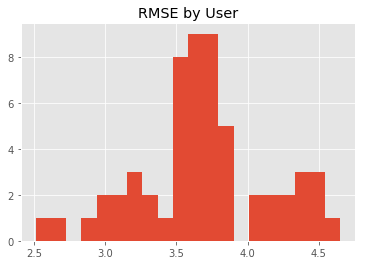

In [35]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

rmsevals = rmse_results['rmse_by_user']['rmse']
rmsevals = rmsevals[rmse_results['rmse_by_user']['count']>10]

plt.hist(rmsevals,bins=20)
plt.title('RMSE by User')
plt.show()

The RMSE values range from 2.5 to 4.6, with most of them located within 3.5-4.0.

In [36]:
rmse_results['precision_recall_by_user']

userId,cutoff,precision,recall,count
3014,1,0.0,0.0,10
3014,2,0.0,0.0,10
3014,3,0.0,0.0,10
3014,4,0.0,0.0,10
3014,5,0.0,0.0,10
3014,6,0.166666666667,0.1,10
3014,7,0.142857142857,0.1,10
3014,8,0.125,0.1,10
3014,9,0.111111111111,0.1,10
3014,10,0.2,0.2,10


It looks like that for userId = 3014, if we recommend based on item_similarity algorithm 5 movies or less, none of them were rated positively by this user.  

In [37]:
import graphlab.aggregate as agg

# we will be using these aggregations
agg_list = [agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall'),agg.STD('recall')]

# apply these functions to each group (we will group the results by 'k' which is the cutoff)
# the cutoff is the number of top items to look for see the following URL for the actual equation
# https://dato.com/products/create/docs/generated/graphlab.recommender.util.precision_recall_by_user.html#graphlab.recommender.util.precision_recall_by_user
rmse_results['precision_recall_by_user'].groupby('cutoff',agg_list)


cutoff,Avg of precision,Stdv of precision,Avg of recall,Stdv of recall
36,0.173611111111,0.161511714593,0.333521994527,0.226110333872
2,0.38,0.406939798988,0.0533654490354,0.0861414148521
46,0.155,0.150067880041,0.367763794082,0.2238627588
31,0.187096774194,0.169101192543,0.31505731259,0.228628313785
26,0.201153846154,0.175399375222,0.294358271722,0.219279316146
8,0.2975,0.252969859865,0.154988316387,0.168694694712
5,0.338,0.278129466256,0.116285632655,0.145228896541
16,0.25,0.208603990853,0.235244593764,0.199320319937
41,0.165609756098,0.156375324517,0.358651518356,0.226723340883
4,0.3525,0.291751178232,0.101588976168,0.136041978158


#### Evaluate ranking_factorization recommender 

We use the best parameters obtained above for the following ranking_factorization_recommender. 

In [38]:
rec1 = gl.recommender.ranking_factorization_recommender.create(train, 
                                  user_id="userId", 
                                  item_id="title", 
                                  target="rating",
                                  num_factors=32,                 # override the default value
                                  regularization=1e-03,           # override the default value
                                  linear_regularization = 1e-3,   # override the default value
                                  ranking_regularization = 0.1,   # override the default value
                                  num_sampled_negative_examples = 4, # override the default value
                                  max_iterations = 50   )   # override the default value

rmse_results = rec1.evaluate(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 19997751 observations with 138493 users and 26729 items.

Data prepared in: 14.2928s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 0.001    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 0.001    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.1      |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 2499718 / 19997751 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 0.00368454        | Not Viable                               |

| 1       | 0.000921136       | 1.48521                                  |

| 2       | 0.000460568       | 1.47567                                  |

| 3       | 0.000230284       | 1.4689                                   |

| 4       | 0.000115142       | 1.46708                                  |

| 5       | 5.7571e-005       | 1.47068                                  |

| 6       | 2.87855e-005      | 1.47913                                  |

| 7       | 1.43927e-005      | 1.49491                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.000115142       | 1.46708                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 1.53196           | 1.05199               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 10.06s       | 1.48956           | 0.992025              | 0.000115142 |

| 2       | 19.86s       | 1.48085           | 0.985721              |             |

| 3       | 29.80s       | 1.48015           | 0.98489               |             |

| 4       | 39.64s       | 1.48041           | 0.984646              |             |

| 5       | 49.87s       | 1.48064           | 0.984476              |             |

| 6       | 59.67s       | 1.48088           | 0.984469              |             |

| 7       | 1m 9s        | 1.48073           | 0.984333              | 7.0508e-006 |

| 8       | 1m 19s       | 1.48097           | 0.984353              |             |

| 9       | 1m 29s       | 1.48105           | 0.984334              |             |

| 10      | 1m 39s       | 1.4811            | 0.984296              |             |

| 11      | 1m 49s       | 1.48093           | 0.984221              |             |

| 12      | 1m 59s       | 1.48106           | 0.984253              |             |

| 13      | 2m 9s        | 1.48097           | 0.984207              |             |

| 14      | 2m 19s       | 1.48106           | 0.984236              | 1.2577e-006 |

| 15      | 2m 29s       | 1.48106           | 0.984225              |             |

| 16      | 2m 39s       | 1.48109           | 0.984231              |             |

| 17      | 2m 50s       | 1.48107           | 0.984222              |             |

| 18      | 3m 0s        | 1.48109           | 0.984227              |             |

| 19      | 3m 10s       | 1.48108           | 0.984223              |             |

| 20      | 3m 19s       | 1.4811            | 0.984223              |             |

| 21      | 3m 29s       | 1.48108           | 0.98422               |             |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Convergence on objective within bounds.

Computing final objective value and training RMSE.

Final objective value: 1.48172

Final training RMSE: 0.984467


Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    |      0.23      | 0.0100477230193 |
|   2    |     0.205      | 0.0185206829317 |
|   3    |      0.19      | 0.0258405534522 |
|   4    |     0.1875     | 0.0323531375112 |
|   5    |     0.176      | 0.0362479412494 |
|   6    | 0.166666666667 | 0.0388332849138 |
|   7    | 0.162857142857 | 0.0449372005518 |
|   8    |    0.15125     | 0.0501890404482 |
|   9    | 0.141111111111 | 0.0517024139916 |
|   10   |     0.129      | 0.0520663484179 |
+--------+----------------+-----------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 0.9948525382940786)

Per User RMSE (best)
+--------+-------+----------------+
| userId | count |      rmse      |
+--------+-------+----------------+
| 11658  |   4   | 0.357666538266 |
+--------+-------+----------------+
[1 rows x 3 columns]


Per User RMSE (w

In [39]:
rmse_results['precision_recall_by_user'].groupby('cutoff',[agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall'),agg.STD('recall')])

cutoff,Avg of precision,Stdv of precision,Avg of recall,Stdv of recall
36,0.0788888888889,0.106263706451,0.118167431729,0.112192897548
2,0.205,0.332377797092,0.0185206829317,0.0412839576855
46,0.069347826087,0.0917532958361,0.134189985265,0.118689258081
31,0.0858064516129,0.115969424368,0.110518853516,0.108472616212
26,0.0911538461538,0.124112828035,0.0951163665888,0.10301767905
8,0.15125,0.219584123971,0.0501890404482,0.0844558767041
5,0.176,0.256561883373,0.0362479412494,0.0603656822599
16,0.10875,0.151456470644,0.0712800858058,0.0936888604259
41,0.0741463414634,0.098163990073,0.128656531963,0.117092904906
4,0.1875,0.276981497577,0.0323531375112,0.0587011219159


#### Which recommender is doing better: item_similarity or ranking_factorization?

In [40]:
comparison = gl.recommender.util.compare_models(test, [item_item, rec1])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    |      0.42      | 0.0281205111405 |
|   2    |      0.38      | 0.0533654490354 |
|   3    | 0.383333333333 | 0.0792510595951 |
|   4    |     0.3525     |  0.101588976168 |
|   5    |     0.338      |  0.116285632655 |
|   6    | 0.323333333333 |  0.133589743336 |
|   7    | 0.308571428571 |  0.143537278202 |
|   8    |     0.2975     |  0.154988316387 |
|   9    |      0.29      |  0.166621235043 |
|   10   |     0.284      |  0.178229822645 |
+--------+----------------+-----------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 3.645102967332903)

Per User RMSE (best)
+--------+-------+---------------+
| userId | count |      rmse     |
+--------+-------+---------------+
| 100197 |   4   | 2.06026246036 |
+--------+-------+---------------+
[1 rows x 3 colum

In [41]:
 comparisonstruct = gl.compare(test,[item_item, rec1])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    |      0.42      | 0.0281205111405 |
|   2    |      0.38      | 0.0533654490354 |
|   3    | 0.383333333333 | 0.0792510595951 |
|   4    |     0.3525     |  0.101588976168 |
|   5    |     0.338      |  0.116285632655 |
|   6    | 0.323333333333 |  0.133589743336 |
|   7    | 0.308571428571 |  0.143537278202 |
|   8    |     0.2975     |  0.154988316387 |
|   9    |      0.29      |  0.166621235043 |
|   10   |     0.284      |  0.178229822645 |
+--------+----------------+-----------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    |      0.23      | 0.0100477

In [42]:
gl.show_comparison(comparisonstruct,[item_item, rec1])

From the above graph, it is obvious that item_similarity recommender is doing better than ranking_facotorization recommender in our dataset for each cutoff value.

<a href="#top">Back to Top</a>
### Modeling and Evaluation - Visualize Results<a id="Modeling_and_Evaluation_Visualize_Results"></a>

#### We use the best recommender, item_similarity recommender, on the whole dataset for recommendations.

In [43]:
# This is a well known graphlab example that builds a recommendation system in 5 lines of code
from IPython.display import display
from IPython.display import Image

gl.canvas.set_target('ipynb')

model = gl.recommender.item_similarity_recommender.create(data, 
                                  user_id="userId", 
                                  item_id="title", 
                                  target="rating",
                                  only_top_k= 5,
                                  similarity_type="cosine")
    
results = model.recommend(users=None, k=5)
#model.save("my_model")

Recsys training: model = item_similarity

Preparing data set.

Data has 20000263 observations with 138493 users and 26729 items.

Data prepared in: 14.7526s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 3.99ms                         | 0.5        |

| 263.297ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 1.18s                               | 0                | 0               |

| 2.18s                               | 2.25             | 664             |

| 3.18s                               | 5                | 1368            |

| 4.18s                               | 7.75             | 2076            |

| 5.18s                               | 10               | 2735            |

| 6.19s                               | 12.75            | 3413            |

| 7.19s                               | 15.25            | 4097            |

| 8.19s                               | 18               | 4846            |

| 9.19s                               | 21               | 5649            |

| 10.19s                              | 23.75            | 6390            |

| 11.19s                              | 26.75            | 7168            |

| 12.19s                              | 29.75            | 7995            |

| 13.19s                              | 32.75            | 8805            |

| 14.19s                              | 35.5             | 9554            |

| 15.19s                              | 38               | 10217           |

| 16.19s                              | 41               | 10994           |

| 17.20s                              | 44.25            | 11834           |

| 18.19s                              | 47.25            | 12690           |

| 19.20s                              | 50.25            | 13460           |

| 20.20s                              | 53               | 14168           |

| 21.20s                              | 55.75            | 14904           |

| 22.20s                              | 58.25            | 15588           |

| 23.20s                              | 60.75            | 16256           |

| 24.20s                              | 63               | 16873           |

| 25.20s                              | 65.25            | 17476           |

| 26.20s                              | 67.75            | 18115           |

| 27.20s                              | 70               | 18722           |

| 28.20s                              | 72.25            | 19318           |

| 29.20s                              | 74.5             | 19935           |

| 30.21s                              | 76.75            | 20534           |

| 31.21s                              | 79               | 21141           |

| 32.21s                              | 81.25            | 21734           |

| 33.21s                              | 83.25            | 22298           |

| 34.21s                              | 85.25            | 22832           |

| 35.21s                              | 87.25            | 23368           |

| 36.21s                              | 89.25            | 23903           |

| 37.21s                              | 91.25            | 24412           |

| 38.21s                              | 93               | 24924           |

| 39.21s                              | 95               | 25430           |

| 40.21s                              | 97               | 25940           |

| 41.21s                              | 98.75            | 26425           |

| 44.30s                              | 100              | 26729           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 45.1184s

recommendations finished on 1000/138493 queries. users per second: 16994.4

recommendations finished on 2000/138493 queries. users per second: 14531.4

recommendations finished on 3000/138493 queries. users per second: 13926

recommendations finished on 4000/138493 queries. users per second: 13595.5

recommendations finished on 5000/138493 queries. users per second: 13586.4

recommendations finished on 6000/138493 queries. users per second: 13519.2

recommendations finished on 7000/138493 queries. users per second: 13471.6

recommendations finished on 8000/138493 queries. users per second: 13413.7

recommendations finished on 9000/138493 queries. users per second: 13388.8

recommendations finished on 10000/138493 queries. users per second: 13440.6

recommendations finished on 11000/138493 queries. users per second: 13499.9

recommendations finished on 12000/138493 queries. users per second: 13704

recommendations finished on 13000/138493 queries. users per second: 13866.8

recommendations finished on 14000/138493 queries. users per second: 14051.5

recommendations finished on 15000/138493 queries. users per second: 14188.8

recommendations finished on 16000/138493 queries. users per second: 14097.4

recommendations finished on 17000/138493 queries. users per second: 14029.2

recommendations finished on 18000/138493 queries. users per second: 14012.5

recommendations finished on 19000/138493 queries. users per second: 13956.6

recommendations finished on 20000/138493 queries. users per second: 13906.7

recommendations finished on 21000/138493 queries. users per second: 13871

recommendations finished on 22000/138493 queries. users per second: 13847.3

recommendations finished on 23000/138493 queries. users per second: 13842.4

recommendations finished on 24000/138493 queries. users per second: 13806.2

recommendations finished on 25000/138493 queries. users per second: 13826.2

recommendations finished on 26000/138493 queries. users per second: 13911.2

recommendations finished on 27000/138493 queries. users per second: 13983.6

recommendations finished on 28000/138493 queries. users per second: 14058.5

recommendations finished on 29000/138493 queries. users per second: 14129

recommendations finished on 30000/138493 queries. users per second: 14095.7

recommendations finished on 31000/138493 queries. users per second: 14051.9

recommendations finished on 32000/138493 queries. users per second: 14017.3

recommendations finished on 33000/138493 queries. users per second: 14002.6

recommendations finished on 34000/138493 queries. users per second: 13977.4

recommendations finished on 35000/138493 queries. users per second: 13942.6

recommendations finished on 36000/138493 queries. users per second: 13920.7

recommendations finished on 37000/138493 queries. users per second: 13894.7

recommendations finished on 38000/138493 queries. users per second: 13885.4

recommendations finished on 39000/138493 queries. users per second: 13886.5

recommendations finished on 40000/138493 queries. users per second: 13950.2

recommendations finished on 41000/138493 queries. users per second: 14001.9

recommendations finished on 42000/138493 queries. users per second: 14046.8

recommendations finished on 43000/138493 queries. users per second: 14080.7

recommendations finished on 44000/138493 queries. users per second: 14045.7

recommendations finished on 45000/138493 queries. users per second: 14012.5

recommendations finished on 46000/138493 queries. users per second: 13993.6

recommendations finished on 47000/138493 queries. users per second: 13963.2

recommendations finished on 48000/138493 queries. users per second: 13946.2

recommendations finished on 49000/138493 queries. users per second: 13937.9

recommendations finished on 50000/138493 queries. users per second: 13906.7

recommendations finished on 51000/138493 queries. users per second: 13895.8

recommendations finished on 52000/138493 queries. users per second: 13874.1

recommendations finished on 53000/138493 queries. users per second: 13882.4

recommendations finished on 54000/138493 queries. users per second: 13915.3

recommendations finished on 55000/138493 queries. users per second: 13954.2

recommendations finished on 56000/138493 queries. users per second: 13992

recommendations finished on 57000/138493 queries. users per second: 14014.8

recommendations finished on 58000/138493 queries. users per second: 13993

recommendations finished on 59000/138493 queries. users per second: 13982

recommendations finished on 60000/138493 queries. users per second: 13958.3

recommendations finished on 61000/138493 queries. users per second: 13941.9

recommendations finished on 62000/138493 queries. users per second: 13938.5

recommendations finished on 63000/138493 queries. users per second: 13926

recommendations finished on 64000/138493 queries. users per second: 13898.9

recommendations finished on 65000/138493 queries. users per second: 13884.5

recommendations finished on 66000/138493 queries. users per second: 13890.9

recommendations finished on 67000/138493 queries. users per second: 13900.1

recommendations finished on 68000/138493 queries. users per second: 13934.6

recommendations finished on 69000/138493 queries. users per second: 13965.4

recommendations finished on 70000/138493 queries. users per second: 13992.7

recommendations finished on 71000/138493 queries. users per second: 14005.5

recommendations finished on 72000/138493 queries. users per second: 13993.5

recommendations finished on 73000/138493 queries. users per second: 13981.9

recommendations finished on 74000/138493 queries. users per second: 13962.7

recommendations finished on 75000/138493 queries. users per second: 13959.6

recommendations finished on 76000/138493 queries. users per second: 13946.4

recommendations finished on 77000/138493 queries. users per second: 13936.1

recommendations finished on 78000/138493 queries. users per second: 13923.5

recommendations finished on 79000/138493 queries. users per second: 13904

recommendations finished on 80000/138493 queries. users per second: 13885

recommendations finished on 81000/138493 queries. users per second: 13702.8

recommendations finished on 82000/138493 queries. users per second: 13714.6

recommendations finished on 83000/138493 queries. users per second: 13721.7

recommendations finished on 84000/138493 queries. users per second: 13677.3

recommendations finished on 85000/138493 queries. users per second: 13647.3

recommendations finished on 86000/138493 queries. users per second: 13620.3

recommendations finished on 87000/138493 queries. users per second: 13602.5

recommendations finished on 88000/138493 queries. users per second: 13576.8

recommendations finished on 89000/138493 queries. users per second: 13549.6

recommendations finished on 90000/138493 queries. users per second: 13527.3

recommendations finished on 91000/138493 queries. users per second: 13507.5

recommendations finished on 92000/138493 queries. users per second: 13517.9

recommendations finished on 93000/138493 queries. users per second: 13528

recommendations finished on 94000/138493 queries. users per second: 13534.1

recommendations finished on 95000/138493 queries. users per second: 13534.2

recommendations finished on 96000/138493 queries. users per second: 13498.3

recommendations finished on 97000/138493 queries. users per second: 13482

recommendations finished on 98000/138493 queries. users per second: 13436.6

recommendations finished on 99000/138493 queries. users per second: 13439.6

recommendations finished on 100000/138493 queries. users per second: 13431.7

recommendations finished on 101000/138493 queries. users per second: 13427.5

recommendations finished on 102000/138493 queries. users per second: 13432.2

recommendations finished on 103000/138493 queries. users per second: 13421.1

recommendations finished on 104000/138493 queries. users per second: 13429.2

recommendations finished on 105000/138493 queries. users per second: 13433.8

recommendations finished on 106000/138493 queries. users per second: 13457

recommendations finished on 107000/138493 queries. users per second: 13481.5

recommendations finished on 108000/138493 queries. users per second: 13505.7

recommendations finished on 109000/138493 queries. users per second: 13527.8

recommendations finished on 110000/138493 queries. users per second: 13526.4

recommendations finished on 111000/138493 queries. users per second: 13524.9

recommendations finished on 112000/138493 queries. users per second: 13518.7

recommendations finished on 113000/138493 queries. users per second: 13515.7

recommendations finished on 114000/138493 queries. users per second: 13514.4

recommendations finished on 115000/138493 queries. users per second: 13514.7

recommendations finished on 116000/138493 queries. users per second: 13502.5

recommendations finished on 117000/138493 queries. users per second: 13498.2

recommendations finished on 118000/138493 queries. users per second: 13501.7

recommendations finished on 119000/138493 queries. users per second: 13503.6

recommendations finished on 120000/138493 queries. users per second: 13523.8

recommendations finished on 121000/138493 queries. users per second: 13543.6

recommendations finished on 122000/138493 queries. users per second: 13564.7

recommendations finished on 123000/138493 queries. users per second: 13585.5

recommendations finished on 124000/138493 queries. users per second: 13586.7

recommendations finished on 125000/138493 queries. users per second: 13580.5

recommendations finished on 126000/138493 queries. users per second: 13572.9

recommendations finished on 127000/138493 queries. users per second: 13561.2

recommendations finished on 128000/138493 queries. users per second: 13553.9

recommendations finished on 129000/138493 queries. users per second: 13549.6

recommendations finished on 130000/138493 queries. users per second: 13552.5

recommendations finished on 131000/138493 queries. users per second: 13545.5

recommendations finished on 132000/138493 queries. users per second: 13541.3

recommendations finished on 133000/138493 queries. users per second: 13544.1

recommendations finished on 134000/138493 queries. users per second: 13563.3

recommendations finished on 135000/138493 queries. users per second: 13579.6

recommendations finished on 136000/138493 queries. users per second: 13563.1

recommendations finished on 137000/138493 queries. users per second: 13505.7

recommendations finished on 138000/138493 queries. users per second: 13311.1

In [44]:
results # the recommendation output

userId,title,score,rank
3,Men in Black (a.k.a. MIB)(1997) ...,0.150095128121,1
3,Indiana Jones and theLast Crusade (1989) ...,0.116173562838,2
3,Pulp Fiction (1994),0.116167081231,3
3,Ghostbusters (a.k.a.Ghost Busters) (1984) ...,0.0855018442327,4
3,Star Trek: The MotionPicture (1979) ...,0.0738446208882,5
6,Eraser (1996),0.470474161208,1
6,Star Wars: Episode VI -Return of the Jedi (1 ...,0.245952243606,2
6,Broken Arrow (1996),0.238403196136,3
6,Father of the Bride PartII (1995) ...,0.227094131211,4
6,Back to the Future (1985),0.214899217089,5


In the above model creation, we have found the top five highest ranking items for each user. Two users are shown with their corresponding highest ranking items (that they have not rated yet).

In [45]:
#convert the results to a dataframe
user_rec = results.to_dataframe()
user3_rec = user_rec.loc[user_rec.userId==3]
user3_rec

,userId,title,score,rank
0,3,Men in Black (a.k.a. MIB) (1997),0.150095,1
1,3,Indiana Jones and the Last Crusade (1989),0.116174,2
2,3,Pulp Fiction (1994),0.116167,3
3,3,Ghostbusters (a.k.a. Ghost Busters) (1984),0.085502,4
4,3,Star Trek: The Motion Picture (1979),0.073845,5


In [46]:
user3_rec_1 = pd.merge(user3_rec,
                 movies,
                 on='title')
user3_rec_1.head()

,userId,title,score,rank,movieId,genres,poster,year
0,3,Men in Black (a.k.a. MIB) (1997),0.150095,1,1580,Action|Comedy|Sci-Fi,ml-20m/MLP-20M/1580.jpg,1997
1,3,Indiana Jones and the Last Crusade (1989),0.116174,2,1291,Action|Adventure,ml-20m/MLP-20M/1291.jpg,1989
2,3,Pulp Fiction (1994),0.116167,3,296,Comedy|Crime|Drama|Thriller,ml-20m/MLP-20M/296.jpg,1994
3,3,Ghostbusters (a.k.a. Ghost Busters) (1984),0.085502,4,2716,Action|Comedy|Sci-Fi,ml-20m/MLP-20M/2716.jpg,1984
4,3,Star Trek: The Motion Picture (1979),0.073845,5,1371,Adventure|Sci-Fi,ml-20m/MLP-20M/1371.jpg,1979


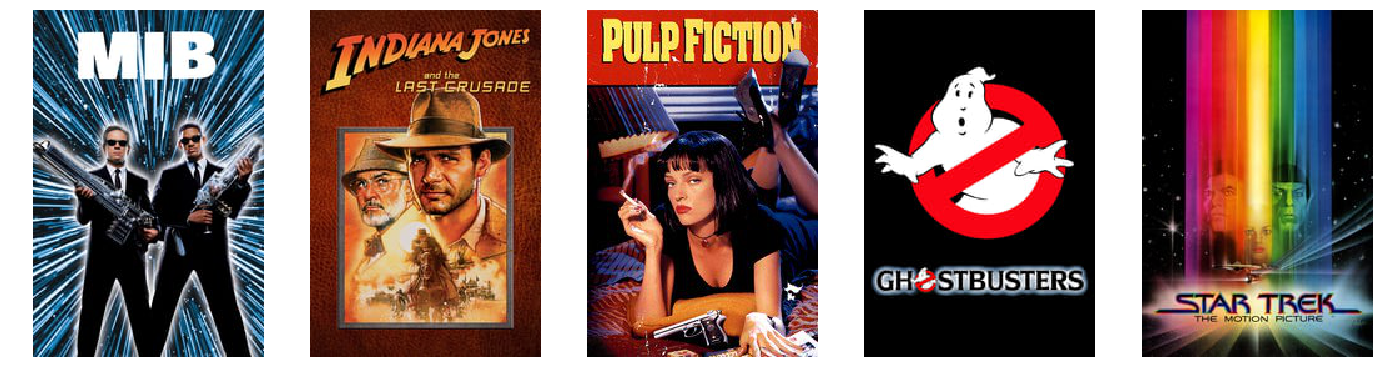

In [47]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
fig = figure(figsize=(24, 12))

for i in range (len(user3_rec_1)):
    filename=user3_rec_1['poster'].values[i]
    a=fig.add_subplot(1,len(user3_rec_1),i+1)
    image = imread(filename)
    imshow(image)
    axis('off')

We want to compare the movies that were rated highest by userID = 3 to the movies that were recommended by our recommender. 

In [48]:
user3 = result.loc[(result.userId==3) & (result.rating==5) ].sort_values(by='rating',ascending=False)
user3

,movieId,title,genres,poster,year,userId,rating
582575,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,ml-20m/MLP-20M/50.jpg,1995,3,5.0
7603900,1374,Star Trek II: The Wrath of Khan (1982),Action|Adventure|Sci-Fi|Thriller,ml-20m/MLP-20M/1374.jpg,1982,3,5.0
9661379,2076,Blue Velvet (1986),Drama|Mystery|Thriller,ml-20m/MLP-20M/2076.jpg,1986,3,5.0
9584202,2046,Flight of the Navigator (1986),Adventure|Children|Sci-Fi,ml-20m/MLP-20M/2046.jpg,1986,3,5.0
9419513,2009,Soylent Green (1973),Drama|Mystery|Sci-Fi|Thriller,ml-20m/MLP-20M/2009.jpg,1973,3,5.0
8990032,1909,"X-Files: Fight the Future, The (1998)",Action|Crime|Mystery|Sci-Fi|Thriller,ml-20m/MLP-20M/1909.jpg,1998,3,5.0
8878650,1831,Lost in Space (1998),Action|Adventure|Sci-Fi,ml-20m/MLP-20M/1831.jpg,1998,3,5.0
8519623,1676,Starship Troopers (1997),Action|Sci-Fi,ml-20m/MLP-20M/1676.jpg,1997,3,5.0
7619792,1375,Star Trek III: The Search for Spock (1984),Action|Adventure|Sci-Fi,ml-20m/MLP-20M/1375.jpg,1984,3,5.0
7500762,1356,Star Trek: First Contact (1996),Action|Adventure|Sci-Fi|Thriller,ml-20m/MLP-20M/1356.jpg,1996,3,5.0


As we can see from the above output, this user gave highest ratings (=5) to SciFi/Thriller/Adventure types of movies (total 76 ratings at scale of 5). Our model correctly recommended the same types of movies for this user.

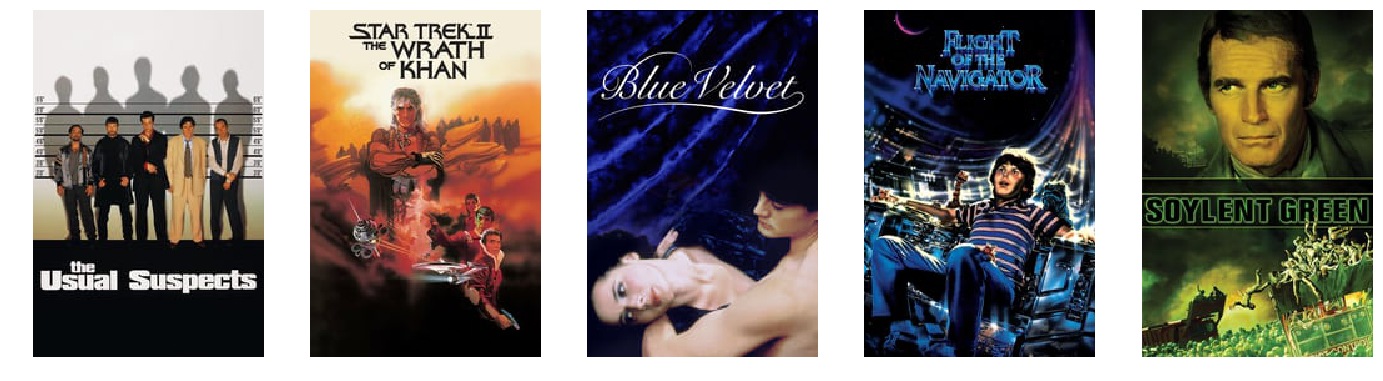

In [49]:
#to select 5 posters to print out of 76 posters shown above. 
fig = figure(figsize=(24, 12))

for i in range (5):
    filename=user3['poster'].values[i]
    a=fig.add_subplot(1,5,i+1)
    image = imread(filename)
    imshow(image)
    axis('off')

<a href="#top">Back to Top</a>
### Modeling and Evaluation - Summarize The Ramifications<a id="Modeling_and_Evaluation_Summarize_The_Ramifications"></a>

1. From the evaluation of the item-item collaborative filtering (CF) scheme we make some important findings. First, the item-similarity scheme provides better quality of predictions than the ranking-factorization scheme in the movie dataset presented here. The improvement in quality is consistent over different precision and recall pairs. Secondly, due to the model-based approach, it is possible to retain only a small subset of items and produce reasonably good prediction quality. Our results support that claim. Using item_similarity recommender on only 100 users' input data (out of total 138,493 users), we were able to achieve a mean precision at least 30% with recommendation items up to 7 movies. We noticed that the mean precision is at 42% when giving just one movie recommendation. Therefore, the item-similarity scheme is capable in addressing the two most important challenges of recommender systems for E-Commerce: quality of prediction and high performance.

2. Recommender systems are a powerful technology for extracting additional value for a business from its user databases. These systems help users find items they want to buy from a business. Recommender systems benefit users by enabling them to find items they like. Conversely, they help the business by generating more sales. Recommender systems are rapidly becoming a crucial tool in E-commerce on the Web. Recommender systems are being stressed by the huge volume of user data in existing corporate databases, and will be stressed even more by the increasing volume of user data available on the Web. New technologies are needed that can dramatically improve the scalability of recommender systems. 

3. Here we presented and evaluated item-item based algorithms for CF-based recommender systems. Our results show that item-based techniques hold the promise of allowing CF-based algorithms to scale to large data sets and at the same time produce high-quality recommendations.

<a href="#top">Back to Top</a>
### Deployment<a id="Deployment"></a>

In online media companies, regular users are looking for ever improving personalized experiences. As they use the system more, the recommendations should become more specific and more accurate. When a new user comes to a site (cold starts) and we know nothing about them we cannot give them good recommendations because our model does not have any history or preference for those users. There are some ways to make our recommended system useful such as request user to pick his/her preferences when signing up or rather than having a personalized system, we can collate the behavior of all users to make more general recommendations.

A recommendation system will never be able to match User A to User B with perfect results, as their tastes will diverge at some point. If two users both rate 10 drama movies as good but differ in their opinion of the Comedy, they are still a very strong match.

in reality, recommendation systems do not set a threshold when looking for compatibility between people; they look for the best possible match. If we have a user, Allen, who has a 95% compatibility with Chad, 80% with Ian, and 30% with Dave, the system will start by looking at Chad when deciding if Allen will like a certain movie. The more users we have in the data set, the more likely it is that a person with a high compatibility will give a response that the system can leverage.

After implementing our recommendation system, it is important to make sure that it is working. One of the best approaches to test our RS is A/B testing. By creating 2 different versions of our web page — one which utilizes our Recommendation System and one which does not — different customers see different versions of the website and we are able to observe which is more effective, by measuring how many of users watch movies that we recommended to them. We also can use this test to see how often our model need to be updated.

<a href="#top">Back to Top</a>
### Exceptional Work<a id="Exceptional_Work"></a>

### 1.  Creating a User-Item Matrices to find movies based on a single selection
We use SVD (Singular-Value Decomposition) to reduce the matrix.

#### Convert the Data to a User-Item Matrix

In [50]:
#load the needed packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import spatial

#enable inline plotting
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import re
import os


#load the raw datasets
print(os.listdir("ml-20m"))

movies = pd.read_csv("ml-20m/movies.csv")
ratings = pd.read_csv("ml-20m/ratings.csv")
tags = pd.read_csv("ml-20m/tags.csv")

['.gitignore', 'genome-scores.csv', 'genome-tags.csv', 'graphlabDF.csv', 'links.csv', 'mergedDF.csv', 'MLP-20M', 'movies.csv', 'ratings.csv', 'README.txt', 'result.csv', 'result1.csv', 'tags.csv']


In [51]:
#remove the "timestamp" column in ratings dataframe
del ratings['timestamp']
#ratings.describe()

#remove the "timestamp" column in tags datafram
del tags['timestamp']

#incorporate the poster file info into the movies dataframe
movies['poster']=movies.apply(lambda x:'ml-20m/MLP-20M/%s.jpg' %(x['movieId']), axis=1)
#create a year column in movie dataframe
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

#merge movies with tags to get a more full dataset
movies_tag = movies.merge(tags, on='movieId', how='inner')

# then merge movies_tag and rating data
mergedDF = pd.merge(movies_tag,ratings)
# now lets look at our data final dataset for this part of work
print(mergedDF.head(10))
print(mergedDF.info())

   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
5        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
6        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
7        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
8        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
9        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

                 poster  year  userId                                     tag  \
0  ml-20m/MLP-20M/1.jpg  1995    1644                                 W

In [52]:
#import TruncatedSVD from sklearn
from sklearn.decomposition import TruncatedSVD

#convert the Data to a User-Item Matrix based on just the rating, userId and title data
#TruncatedSVD will not allow NULL so using the fill_value to produce 0 for the NULL
rating_pivot = mergedDF.pivot_table(values='rating', index='userId', columns='title', fill_value=0)
#looking at the first 5 entries
rating_pivot.head()

title,$9.99 (2008),'Salem's Lot (2004),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(Untitled) (2009),*batteries not included (1987),+1 (2013),...And Justice for All (1979),1 (2013),...,[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),alaskaLand (2013),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nos amours (1983),Åsa-Nisse - Wälkom to Knohult (2011)
userId,,,,,,,,,,,,,,,,,,,,,
65,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0
96,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0
121,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0
129,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0
133,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0


we need to transpose the matrix.

In [53]:
#looking at the shape of the matrix
rating_pivot.shape

(7159, 13390)

In [54]:
#transposing the rating_pivot using the T command
rating_transpose = rating_pivot.values.T

#check to see if things flipped
rating_transpose.shape

(13390L, 7159L)

#### Running SVD (Singular-Value Decomposition) to reduce the matrix

In [55]:
#using 12 components
rating_SVD = TruncatedSVD(n_components=12, random_state=42)
result_maxrix = rating_SVD.fit_transform(rating_transpose)
#looking at the shape of the smaller matrix
result_maxrix.shape

(13390L, 12L)

#### Create a Pearson's R Correlation for every movie
We can use this to compare one movie to others that someone may like based on user preferences.

In [56]:
result_corr = np.corrcoef(result_maxrix)
#looking at the shape
result_corr.shape

(13390L, 13390L)

#### Test the system on one of our favorite movies: The Shawshank Redemption

In [57]:
# create a movie names index
movie_names = rating_pivot.columns
movie_list = list(movie_names)

#pull the index number of the movie you want to find similarities too
Shawshank = movie_list.index('Shawshank Redemption, The (1994)')
#print out the index of our movie
print(Shawshank)

10572


#### Get the correlation result of our movie

In [58]:
corr_Shawshank = result_corr[Shawshank]
#This is shape of the Pearson's R Correlation for one movie.
#It shows 13390 results for this one movie. This is how it compares to all the others in the data set.
corr_Shawshank.shape

(13390L,)

In [59]:
corr_Shawshank

array([ 0.45512982, -0.21720439, -0.01794209, ...,  0.30875932,
        0.24424757,  0.00223445])

#### Finding highly correlated movies

In [60]:
#finding some of the top correlated movies to ours
list(movie_names[(corr_Shawshank < 1.0) & (corr_Shawshank > 0.9)])

['Beautiful Mind, A (2001)',
 'Forrest Gump (1994)',
 'Good Will Hunting (1997)',
 'Platoon (1986)',
 'Rain Man (1988)',
 "Schindler's List (1993)",
 'Shakespeare in Love (1998)',
 'Silence of the Lambs, The (1991)',
 'Sixth Sense, The (1999)']

In [61]:
#finding the highest correlated movie to ours
MovieList = list(movie_names[(corr_Shawshank < 1.0) & (corr_Shawshank > 0.923)])
MovieList

['Forrest Gump (1994)',
 'Rain Man (1988)',
 'Shakespeare in Love (1998)',
 'Silence of the Lambs, The (1991)',
 'Sixth Sense, The (1999)']

#### Showing the posters of recommended movies

In [62]:
#find the movieId for each movie in MovieList
dict = {'title': MovieList}
df = pd.DataFrame(dict)
print(df)

df1 = pd.merge(df, movies) 
print(df1)

                              title
0               Forrest Gump (1994)
1                   Rain Man (1988)
2        Shakespeare in Love (1998)
3  Silence of the Lambs, The (1991)
4           Sixth Sense, The (1999)
                              title  movieId                    genres  \
0               Forrest Gump (1994)      356  Comedy|Drama|Romance|War   
1                   Rain Man (1988)     1961                     Drama   
2        Shakespeare in Love (1998)     2396      Comedy|Drama|Romance   
3  Silence of the Lambs, The (1991)      593     Crime|Horror|Thriller   
4           Sixth Sense, The (1999)     2762      Drama|Horror|Mystery   

                    poster  year  
0   ml-20m/MLP-20M/356.jpg  1994  
1  ml-20m/MLP-20M/1961.jpg  1988  
2  ml-20m/MLP-20M/2396.jpg  1998  
3   ml-20m/MLP-20M/593.jpg  1991  
4  ml-20m/MLP-20M/2762.jpg  1999  


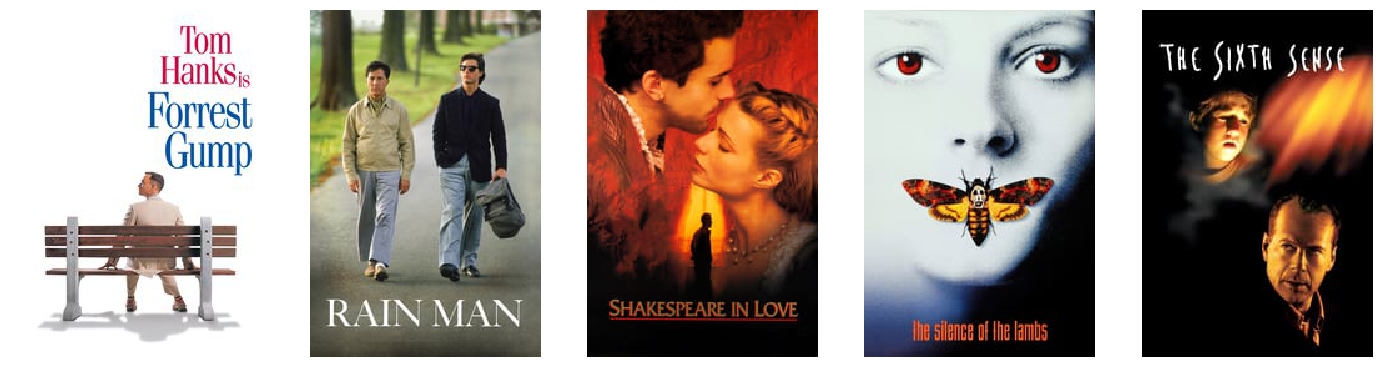

In [63]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

fig = figure(figsize=(24, 12))

for i in range (len(df1)):
    id = df1.movieId.values[i]
    filename='ml-20m/MLP-20M/'+str(id)+'.jpg'
    a=fig.add_subplot(1,len(df1),i+1)
    image = imread(filename)
    imshow(image)
    axis('off')